# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

* Observar las tablas para identificar y corregir problemas como:
    * Columnas con mayusculas y/o minusculas
    * Espacios innecesarios
    * Valores nulos en columnas

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# leer conjuntos de datos en los DataFrames
df_aisles = pd.read_csv('aisles.csv', delimiter=';')
df_departments = pd.read_csv('departments.csv', delimiter=';')
df_op = pd.read_csv('order_products.csv', delimiter=';')
df_io = pd.read_csv('instacart_orders.csv', delimiter=';')
df_products = pd.read_csv('products.csv', delimiter=';')




In [ ]:
# mostrar información del DataFrame
print(df_aisles.head())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [ ]:
# mostrar información del DataFrame
print(df_departments.head())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [ ]:
# mostrar información del DataFrame
print(df_io.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [ ]:
# mostrar información del DataFrame
print(df_op.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [ ]:
# mostrar información del DataFrame
print(df_products.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


## Observaciones

* df_aisles = contiene los nombres de los pasillos (variable de texto) asociado a un id (variable entera)
* df_departments = contiene los nombres de los departamentos (variable de texto) asociado a un id (variable entera)
* df_io = contiene el id de la orden (string), id de producto (int), cantidad añadida al carrito (float) y los re ordenados (int)
* df_op = order id (string), user id (string), numero de orden (int), order dow (int), oder hour day (int), days sine prior order 
(float)
* df_products =  product_id (int), product_name (string), aisle_id (int), department_id (int)
* En lo que parece a simple vista que son los campos, habria de analizar con un describe() o info() para asegurarnos que los id sean string

## Preprocesamiento de los datos

* Verificar y corregir los tipos de datos (columnas de ID a números enteros).
* Identificar y completar los valores ausentes.
* Identificar y eliminar los valores duplicados.


### `instacart_orders` data frame

In [ ]:
# Revisar si hay pedidos duplicados

duplicates = df_io.duplicated()

print(df_io[duplicates])

print(df_io.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 


 Hay 15 valores duplicados coinciden en order_dow == 3  y order_hour_of_day == 2

In [ ]:
# Verificar todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

wednesday_orders = df_io[(df_io['order_dow'] == 3) & (df_io['order_hour_of_day'] == 2)]

# Mostrar los resultados
print(wednesday_orders)
print(wednesday_orders.shape[0])



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

Hubo 121 pedidos que se hicieron el miércoles a las 2:00 a.m.

In [ ]:
# Eliminar los pedidos duplicados
df_io.drop_duplicates(inplace=True)


In [ ]:
# Verificar si hay filas duplicadas
duplicates = df_io.duplicated()

print(df_io[duplicates])

print(df_io.duplicated().sum())


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
0


In [ ]:
# Verificar si hay IDs duplicados de pedidos
 
order_id_duplicates = df_io['order_id'].duplicated()
    
print(df_io[order_id_duplicates])
print(order_id_duplicates.sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
0


### `products` data frame

In [ ]:
# Verificar si hay filas totalmente duplicadas

duplicates = df_products.duplicated()

print(df_products[duplicates])

print(duplicates.sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
0


In [ ]:
# Verificar si hay IDs duplicadas de productos
duplicates = df_products['product_id'].duplicated()

print(df_products[duplicates])

print(duplicates.sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
0


In [ ]:
# Revisar si hay nombres duplicados de productos. 

df_products['product_name'] = df_products['product_name'].str.upper() ## Convertir todo a mayusculas

duplicates = df_products['product_name'].duplicated()
print(df_products[duplicates])

print(duplicates.sum())



       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [ ]:
# Revisar si hay nombres duplicados de productos no faltantes

noNAN_products = df_products['product_name'].dropna()

duplicates = noNAN_products.duplicated()

print( duplicates.sum())


104


* En las primeras columnas unicamente verifique los datos duplicados, de los cuaes no hubo duplicados

* Para la columna de product_name, converti los str a mayusculas con upper, obtuve que el total de duplicados fue de 1361, pero al descartar los valores vacios NAN solo obtuve 104 valores duplicados

### `departments` data frame

In [ ]:
# Revisar si hay filas totalmente duplicadas
duplicates = df_departments.duplicated()

print(df_departments[duplicates])
print(duplicates.sum())

Empty DataFrame
Columns: [department_id, department]
Index: []
0


In [ ]:
# Revisar si hay IDs duplicadas de productos

duplicates = df_departments['department_id'].duplicated()

print(df_departments[duplicates])
print(duplicates.sum())

Empty DataFrame
Columns: [department_id, department]
Index: []
0


* No encontre valores totalmente duplicados en el dataframe, tampoco en la columna department_id

### `aisles` data frame

In [ ]:
# Revisar si hay filas totalmente duplicadas
duplicates = df_aisles.duplicated()

print(df_aisles[duplicates])
print(duplicates.sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []
0


In [ ]:
# Revisar si hay IDs duplicadas de productos
duplicates = df_aisles['aisle_id'].duplicated()

print(df_aisles[duplicates])
print(duplicates.sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []
0


* No hay duplicados en el dataset 

### `order_products` data frame

In [ ]:
# Revisar si hay filas totalmente duplicadas

duplicates = df_op.duplicated()

print(df_op[duplicates])
print(duplicates.sum())


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
0


In [ ]:
# Verificar si hay cualquier otro duplicado engañoso

duplicates = df_op.duplicated()

print(df_op[duplicates])
print(duplicates.sum())


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
0


## Encoentrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encontrar los valores ausentes en la columna 'product_name'

NAN = df_products['product_name'].isna()

print(NAN)
print(NAN.sum())


0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_name, Length: 49694, dtype: bool
1258


* Existen 1258 valores ausentes

In [ ]:
# Verificar si todos los nombres de productos ausentes están relacionados con el pasillo con ID 100

NAN = df_products[df_products['product_name'].isna()]

NAN_id100 = NAN['aisle_id'] == 100

print(NAN)
print(NAN_id100.sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
1258


* Asi es, Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100

In [ ]:
# Verificar si todos los nombres de productos ausentes están relacionados con el departamento con ID 21
NAN = df_products[df_products['product_name'].isna()]

NAN_id100 = NAN['department_id'] == 21

print(NAN)
print(NAN_id100.sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
1258


* Si, todos los nombres de productos ausentes estan relacionados con el departamento con ID 21

In [ ]:
# Usar las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

dept_21 = df_departments[df_departments['department_id'] == 21]

aisle_100 = df_aisles[df_aisles['aisle_id'] == 100]

print(dept_21)

print(aisle_100)


    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


* Al revisar ambas tablas, se puede observar que hay valores ausentes en ambos casos

In [ ]:
# Completar los nombres de productos ausentes con 'Unknown'

df_products['product_name'].fillna('Unknown', inplace=True)

NAN = df_products['product_name'].isna()

print(df_products[NAN])
print(NAN.sum())



Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
0


* Intercambie todos los valores ausentes de produc_name por el string Unknow y verifique que los valores ausentes fueran igual a 0

### `orders` data frame

In [ ]:
# Encontrar los valores ausentes
NAN = df_io.isna()

print(NAN)
print(NAN.sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0          False    False         False      False              False   
1          False    False         False      False              False   
2          False    False         False      False              False   
3          False    False         False      False              False   
4          False    False         False      False              False   
...          ...      ...           ...        ...                ...   
478962     False    False         False      False              False   
478963     False    False         False      False              False   
478964     False    False         False      False              False   
478965     False    False         False      False              False   
478966     False    False         False      False              False   

        days_since_prior_order  
0                        False  
1                        False  
2                       

In [ ]:
# Verificar si hay algún valor ausente que no sea el primer pedido del cliente?

no_pedido1 = df_io[df_io['order_number'] > 1]

print(no_pedido1.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


* Existen  28817 valores ausentes en la columna days_since_prior_order, pero al filtrar que no sea el primer pedido del cliente no se encontraron valores ausentes

### `order_products` data frame

In [ ]:
# Encontrar los valores ausentes
NAN = df_op.isna()

print(NAN.sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [ ]:
# Encontrar valores mínimos y máximos en esta columna

print(df_op['add_to_cart_order'].min())
print(df_op['add_to_cart_order'].max())


1.0
64.0


* Hay 836 valores ausentes en la columna add_to cart_order, y sus valores min y max son 1 y 6 respectivamente

In [ ]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

ids = df_op[df_op['add_to_cart_order'].isna()]

print(ids['order_id'])
print(ids['order_id'].count())


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64
836


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupar todos los pedidos con datos ausentes por su ID de pedido.
# Contar el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

missed = df_op[df_op['add_to_cart_order'].isna()]

orders = missed.groupby('order_id').size()

min_count = orders.min()

all_64 = (orders > 64).all()



print("Número de productos en cada pedido con valores ausentes:")
print(orders)

print("Valor mínimo del conteo de productos en pedidos con valores ausentes:")
print(min_count)

if all_64:
    print("Todos los pedidos con valores ausentes tienen más de 64 productos.")
else:
    print("No todos los pedidos con valores ausentes tienen más de 64 productos.")



Número de productos en cada pedido con valores ausentes:
order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Length: 70, dtype: int64
Valor mínimo del conteo de productos en pedidos con valores ausentes:
1
No todos los pedidos con valores ausentes tienen más de 64 productos.


* Despues de agrupar por order_id obtuve que el valor min de valores ausentes es 1 y que no todos los ausentes tienen mas de 64 productos

In [ ]:
# Remplazar los valores ausentes en la columna 'add_to_cart' con 999 y convertir la columna al tipo entero.

df_op['add_to_cart_order'] = df_op['add_to_cart_order'].fillna(999).astype(int)

print(df_op['add_to_cart_order'].head())


0    17
1     1
2     1
3    35
4     5
Name: add_to_cart_order, dtype: int64


* Reemplace los valores NAN por 999 con fillna() y converti la columna a entera con astype(int)

## Conclusiones

* Durante este paso se realizaron tecnicas importantes para limpiar y administrar los datos, empezando por corregir ciertas columnas de acuerdo al tipo de datos que deberian incluir, asimismo se identificaron y verificaron los valores ausentes en los datos para eliminar el riesgo de falsa informacion a la hora del analisis, algunos datos se agruparon por ciertos valores para identificar algunos comportamientos y tambien se filtraron ciertos resultados especificos para obtener informacion mas precisa.


# Análisis de los datos


### Verificar que los valores sean sensibles

In [ ]:
values = df_io['order_hour_of_day'].between(0, 23)

out_of_range = df_io[~values]
print(out_of_range)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [ ]:
values = df_io['order_dow'].between(0,6)

out_of_range = df_io[~values]
print(out_of_range)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


* Todos los valores estan dentro de los rangos indicados.

### Para cada hora del día, ¿cuántas personas hacen órdenes?

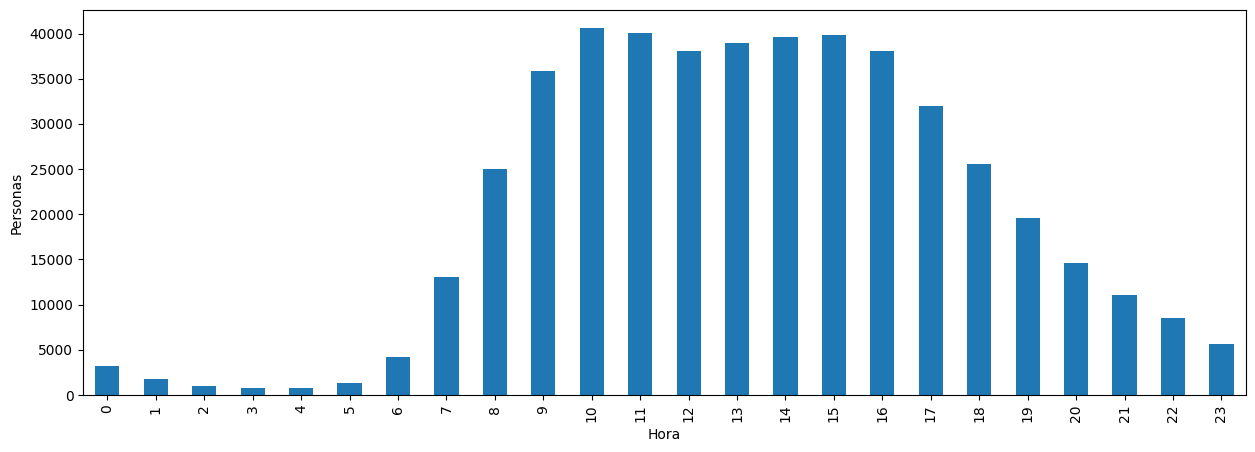

In [ ]:
orders_hour = df_io.groupby('order_hour_of_day')['user_id'].count()

orders_hour.plot(kind = 'bar', x = 'order_hour_of_day', y = 'user_id', xlabel = 'Hora', xlim = [1,24], ylabel = 'Personas', figsize=[ 15, 5])
plt.show()

* La gran mayoria de los pedidos se hacen entre las 9 y las 16 horas, superando los 35000 pedidos cada hora

### ¿Qué día de la semana compran víveres las personas?

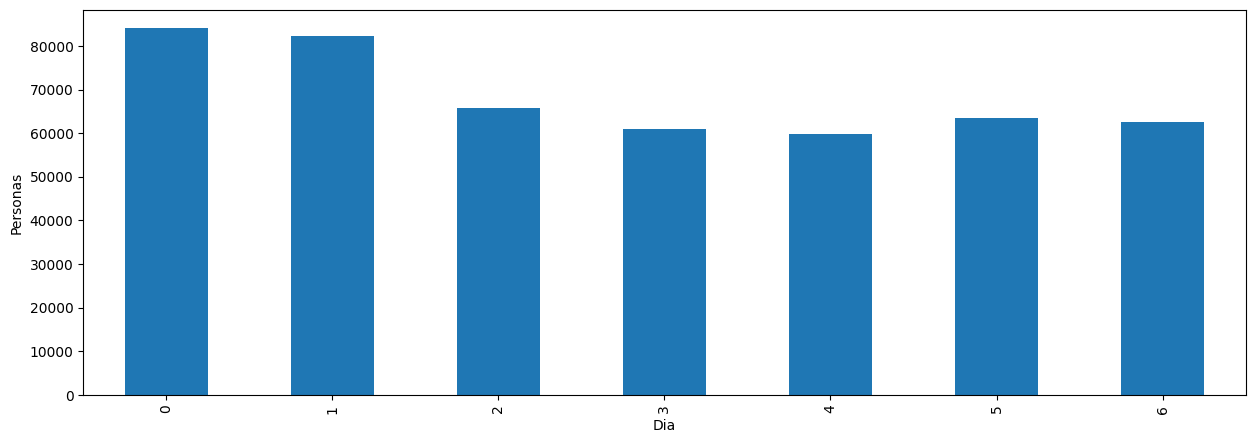

In [ ]:
orders_day = df_io.groupby('order_dow')['user_id'].count()

orders_day.plot(kind = 'bar', x = 'order_dow', y = 'user_id', xlabel = 'Dia', ylabel = 'Personas', figsize=[ 15, 5])
plt.show()

* Todos los dias se hacen compras, pero pude identificar que el Domingo y Lunes son los dias que mas se hacen compras

### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

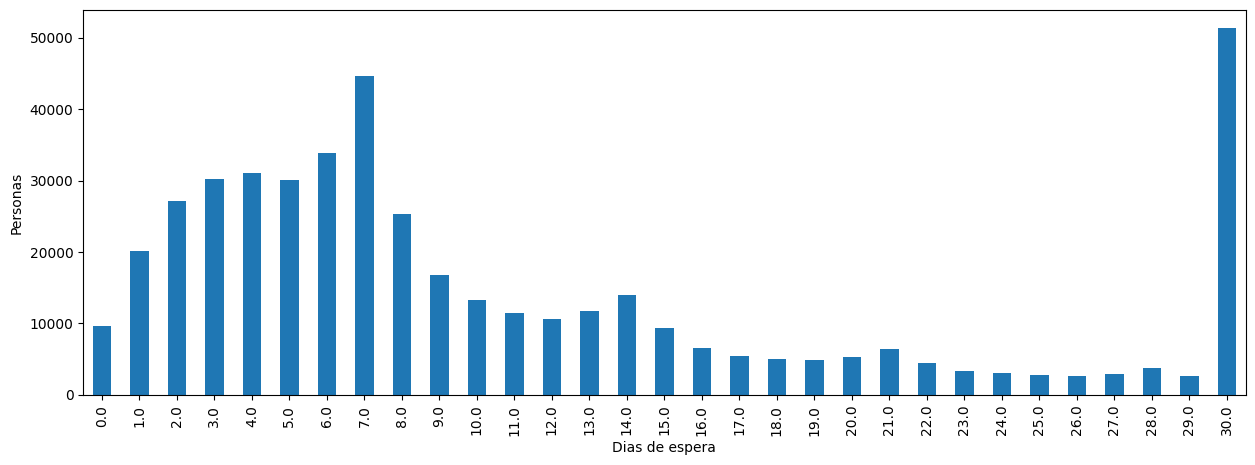

In [ ]:
orders_wait = df_io.groupby('days_since_prior_order')['user_id'].count()

orders_wait.plot(kind = 'bar', x = 'days_since_prior_order', y = 'user_id', xlabel = 'Dias de espera', ylabel = 'Personas', figsize=[ 15, 5])
plt.show()

* De acuerdo al grafico, el mayor numero de dias de espera son 30 y 50 mil personas esperan ese mes
* El menor numero de dias es 0 y son 10 mil personas las que compran a diario

### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

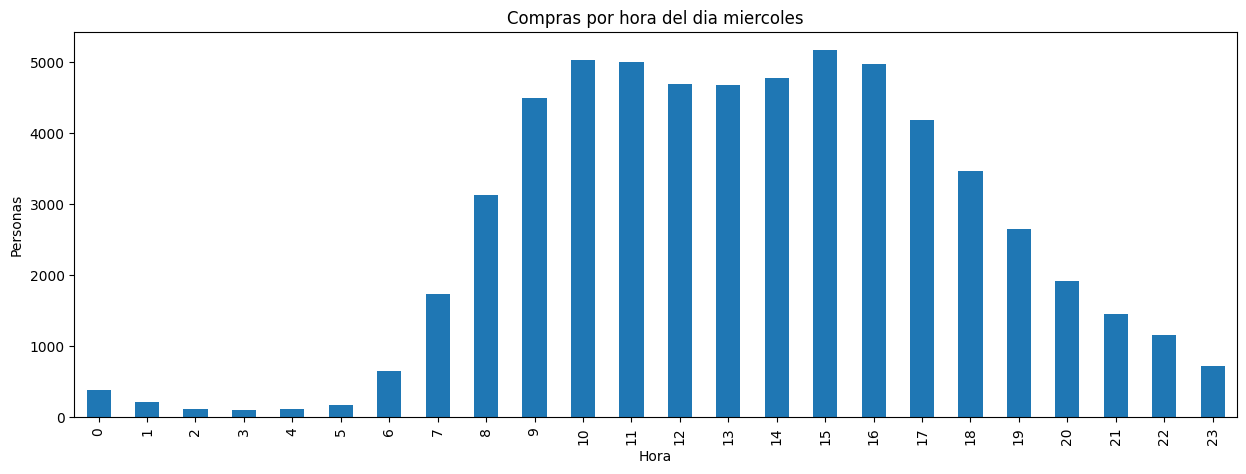

In [ ]:
df_miercoles = df_io[df_io['order_dow'] == 3]
orders_hour = df_miercoles.groupby('order_hour_of_day')['order_dow'].count()

orders_hour.plot(title = 'Compras por hora del dia miercoles', 
                 kind = 'bar', 
                 x = 'order_hour_of_day',
                 y = 'user_id', 
                 xlabel = 'Hora', 
                 ylabel = 'Personas', 
                 figsize=[ 15, 5])
plt.show()

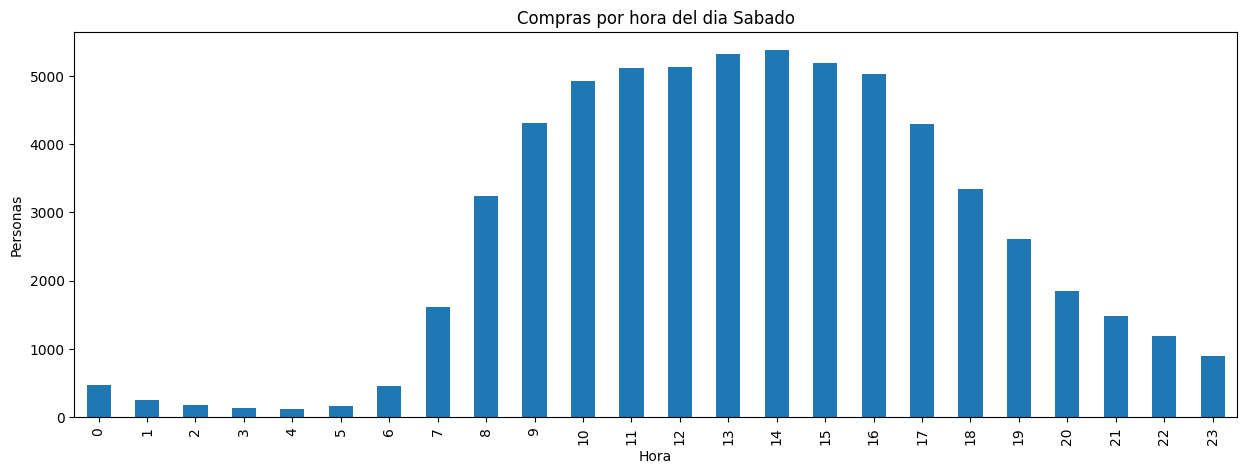

In [ ]:
df_miercoles = df_io[df_io['order_dow'] == 6]
orders_hour = df_miercoles.groupby('order_hour_of_day')['order_dow'].count()

orders_hour.plot(title = 'Compras por hora del dia Sabado', 
                 kind = 'bar',
                 x = 'order_hour_of_day',
                 y = 'user_id', 
                 xlabel = 'Hora', 
                 ylabel = 'Personas', 
                 figsize=[ 15, 5])
plt.show()

* La tendencia es muy parecida, la mayor cantidad de compras ocurren entre las 8 y 18 horas.
* Sin embargo hablando de valores maximos, el dia miercoles presenta una disminucion pequeña de su valor maximo entre las 12 y 14 horas
* Mientras que el dia sabado mantiene su valor casi maximo desde las 10 hasta las 16 horas

### ¿Cuál es la distribución para el número de pedidos por cliente?

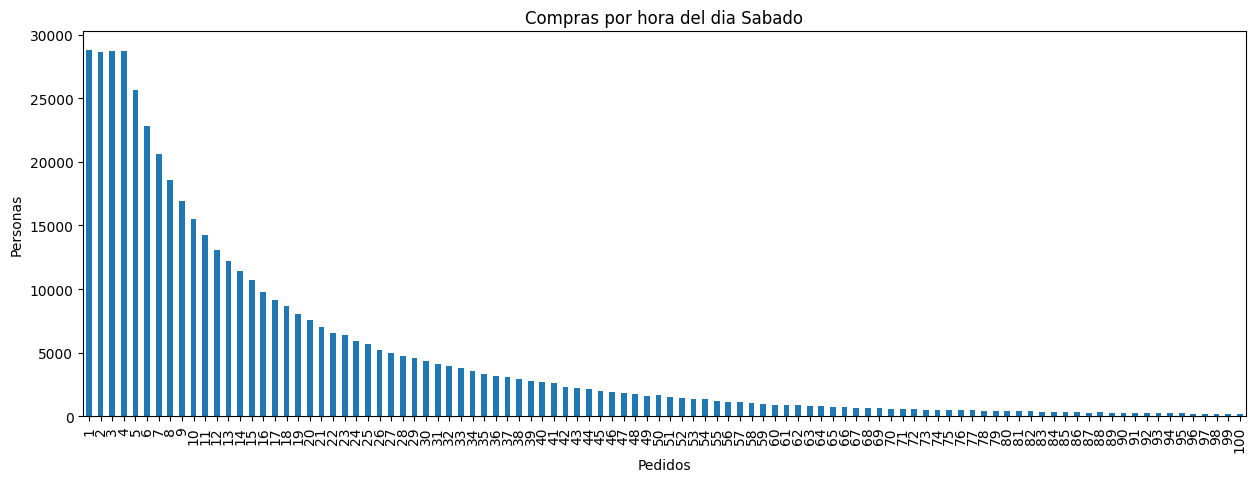

In [ ]:

orders_number = df_io.groupby('order_number')['order_id'].count()

orders_number.plot(title = 'Compras por hora del dia Sabado', 
                 kind = 'bar',
                 x = 'order_number',
                 y = 'user_id', 
                 xlabel = 'Pedidos', 
                 ylabel = 'Personas', 
                 figsize=[ 15, 5])
plt.show()

* De acuerdo a la grafica, conforme el numero de pedidos aumenta la cantidad de clientes disminuye
* Para 4 pedidos o menos son mas de 25 mil personas mientras que a partir de 90 hay una cantidad muy minima.

### ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
top_products = df_op['product_id'].value_counts().head(20)
print(top_products)

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


In [ ]:
# unir dos tablas para obtener el id y nombre de los productos
df_tp = top_products.reset_index().merge(df_products, left_on='index', right_on='product_id')

df_tp.columns = ['product_id', 'order_count', 'product_id_y', 'product_name', 'aisle_id' ,'department_id' ]

print(df_tp)

    product_id  order_count  product_id_y              product_name  aisle_id  \
0        24852        66050         24852                    BANANA        24   
1        13176        53297         13176    BAG OF ORGANIC BANANAS        24   
2        21137        37039         21137      ORGANIC STRAWBERRIES        24   
3        21903        33971         21903      ORGANIC BABY SPINACH       123   
4        47209        29773         47209      ORGANIC HASS AVOCADO        24   
5        47766        24689         47766           ORGANIC AVOCADO        24   
6        47626        21495         47626               LARGE LEMON        24   
7        16797        20018         16797              STRAWBERRIES        24   
8        26209        19690         26209                     LIMES        24   
9        27845        19600         27845        ORGANIC WHOLE MILK        84   
10       27966        19197         27966       ORGANIC RASPBERRIES       123   
11       22935        15898 

In [ ]:
top = df_tp[['product_id', 'order_count', 'product_name']]

print(top)

    product_id  order_count              product_name
0        24852        66050                    BANANA
1        13176        53297    BAG OF ORGANIC BANANAS
2        21137        37039      ORGANIC STRAWBERRIES
3        21903        33971      ORGANIC BABY SPINACH
4        47209        29773      ORGANIC HASS AVOCADO
5        47766        24689           ORGANIC AVOCADO
6        47626        21495               LARGE LEMON
7        16797        20018              STRAWBERRIES
8        26209        19690                     LIMES
9        27845        19600        ORGANIC WHOLE MILK
10       27966        19197       ORGANIC RASPBERRIES
11       22935        15898      ORGANIC YELLOW ONION
12       24964        15292            ORGANIC GARLIC
13       45007        14584          ORGANIC ZUCCHINI
14       39275        13879       ORGANIC BLUEBERRIES
15       49683        13675            CUCUMBER KIRBY
16       28204        12544        ORGANIC FUJI APPLE
17        5876        12232 

* Fue necesario hacer una union (merge) entre las tablas products y order products con respecto a el id product, ya que es un elemnto que ambas tablas tienen, la union se realizo para obtener los productos mas populares de la tabla order products mientras que los nombres de los productos se obtuvieron de la tabla products

* El producto mas comprado son las bananas

### ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
number = df_op.groupby('order_id')['product_id'].count()

print('El promedio de pedidos es:')
print(number.mean())




El promedio de pedidos es:
10.098983215049127


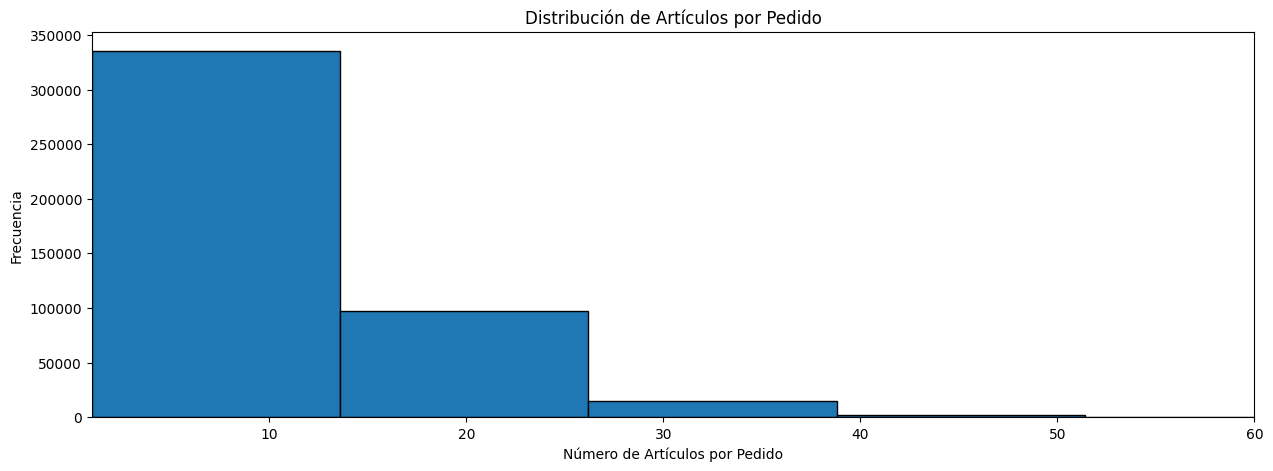

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(number, bins=10, edgecolor='black')

plt.title('Distribución de Artículos por Pedido')
plt.xlabel('Número de Artículos por Pedido')
plt.xlim([1, 60])
plt.ylabel('Frecuencia')

plt.show()

In [ ]:


# Datos de ejemplo
number = [1, 2, 2, 3, 4, 5, 5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# Crear el histograma
plt.figure(figsize=(15, 5))
counts, bins, patches = plt.hist(number, bins=10, edgecolor='black')

# Agregar etiquetas con los valores en la parte superior de cada barra
for count, x in zip(counts, bins[:-1]):  # bins[:-1] evita incluir el último borde del histograma
    plt.text(x + (bins[1] - bins[0]) / 2, count,  # Coordenadas para el texto
             str(int(count)),  # El valor que se mostrará (entero)
             ha='center', va='bottom', fontsize=10)  # Alineación y tamaño de fuente

# Configurar el diseño del gráfico
plt.title('Distribución de Artículos por Pedido')
plt.xlabel('Número de Artículos por Pedido')
plt.xlim([1, 60])
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

* El promedio de articulos comprados en un pedido es de 10, ya que mas de 300 mil personas compraron ese numero de articulos
* 100 mil personas compraron 20 articulos
* ######################################################################

### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
reorder = df_op.groupby('product_id')['reordered'].sum().sort_values(ascending=False).head(20)
                         
print(reorder)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: reordered, dtype: int64


In [ ]:
df_reorder_names =reorder.reset_index().merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
df_reorder_names.columns = ['product_id', 'reorder_count', 'product_name' ]

print(df_reorder_names)


    product_id  reorder_count              product_name
0        24852          55763                    BANANA
1        13176          44450    BAG OF ORGANIC BANANAS
2        21137          28639      ORGANIC STRAWBERRIES
3        21903          26233      ORGANIC BABY SPINACH
4        47209          23629      ORGANIC HASS AVOCADO
5        47766          18743           ORGANIC AVOCADO
6        27845          16251        ORGANIC WHOLE MILK
7        47626          15044               LARGE LEMON
8        27966          14748       ORGANIC RASPBERRIES
9        16797          13945              STRAWBERRIES
10       26209          13327                     LIMES
11       22935          11145      ORGANIC YELLOW ONION
12       24964          10411            ORGANIC GARLIC
13       45007          10076          ORGANIC ZUCCHINI
14       49683           9538            CUCUMBER KIRBY
15       28204           8989        ORGANIC FUJI APPLE
16        8277           8836  APPLE HONEYCRISP 

* Primero obtuve los 20 ids de productos mas reordenados, despues aplique un merge para agregar el nombre de cada producto

### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
total_orders = df_op.groupby('product_id')['reordered'].count()

reordered_times = df_op.groupby('product_id')['reordered'].sum()

proportion = reordered_times / total_orders

In [ ]:
proportion_df = proportion.reset_index().merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

In [ ]:
print(proportion_df[['product_id', 'product_name', 'reordered']])

       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               7                     PURE COCONUT WATER WITH ORANGE   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       reordered  
0       0.564286  
1       0.000000  
2       0.738095  
3       0.510204  
4       0.500000  
...          ...  
45

* Fue necesario agrupar la tabla de order products, de acuerdo a los productos que se volvieron a ordenar y unir con la funcion merge la tabla de productos para obtener el nombre de los productos, realize un count para tener el conteo total y un sum para obtener la suma de los valores agrupados respecto a la columna 'product_id'. La proporcion la obtuve de dividir la suma entre el conteo, y esa columna la uni a la tabla de productos con un merge para obtener el id y nombre de los productos.

###  Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
df_merged = pd.merge(df_op, df_io[['order_id', 'user_id']], on='order_id', how='left')

reorder_proportion = df_merged.groupby('user_id')['reordered'].mean()

print(reorder_proportion)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


* Fue necesario usar un merge para unir df_op y df_io y obtener la columna 'reordered' y agrupar los datos de acuerdo al user id, al aplicar mean() se calcula la proporcion a cada agrupacion que en este caso es el cliente

### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
first_in_cart = df_op[df_op['add_to_cart_order'] == 1]

top_20 = first_in_cart.groupby('product_id')['add_to_cart_order'].count().sort_values(ascending=False).head(20)

names = pd.merge(top_20, df_products[['product_id', 'product_name']], on='product_id', how='left')

print(names)

    product_id  add_to_cart_order                 product_name
0        24852              15562                       BANANA
1        13176              11026       BAG OF ORGANIC BANANAS
2        27845               4363           ORGANIC WHOLE MILK
3        21137               3946         ORGANIC STRAWBERRIES
4        47209               3390         ORGANIC HASS AVOCADO
5        21903               3336         ORGANIC BABY SPINACH
6        47766               3044              ORGANIC AVOCADO
7        19660               2336                 SPRING WATER
8        16797               2308                 STRAWBERRIES
9        27966               2024          ORGANIC RASPBERRIES
10       44632               1914   SPARKLING WATER GRAPEFRUIT
11       49235               1797          ORGANIC HALF & HALF
12       47626               1737                  LARGE LEMON
13         196               1733                         SODA
14       38689               1397     ORGANIC REDUCED F

* Primero se filtra la tabla cuando el orden de agregado al carrito es 1, despues se agrupan los datos por product_id y se relaliza un conteo de forma descente donde se seleccionan solo los primeros 20, despues esos datos se unen con merge a la tabla de productos para obtener los nombres.


### Conclusion general del proyecto:

En el proyecto se realizó un análisis exhaustivo sobre las preferencias de los clientes y la recurrencia de productos en sus pedidos, para ello fue necesario limpiar, eliminar, seleccionar, procesar, agrupar, ordenar, filtrar y operar con loa datos.

Se identificaron:
* Los productos mas escenciales para los clientes y la frecuencia con la que se compran.
* Los clientes que vueven a comprar y que productos.
* Los dias y horarios en los que se realizan mas ventas.
* Los patrones en la cantidad de productos que los clientes tienden a comprar por pedido
    
